# Compétition Kaggle - Luximon Davina DSIA : 6e place

# <font color= red>L'exécution peut se faire directement à partir de la partie "Prédiction des données", plus bas.
  </font>
  
## Chargement du fichier déjà pré-traîté pour un gain de temps.

### Chargement de tous les imports nécéssaires

In [1]:
#!pip install hyperopt
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as datetime
from datetime import date
import re as re 

import xgboost as xgb

from IPython.display import HTML
import sklearn
from sklearn.linear_model import LogisticRegression

import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn import svm
from IPython.display import Image
from scipy import stats
from scipy.stats import norm, skew

np.random.seed(42)
import time 
import warnings
warnings.filterwarnings('ignore')

### Chargement des données

In [2]:
restaurant = pd.read_csv('restaurant.csv', encoding = 'utf_16', sep = '\t')
member = pd.read_csv('member.csv', encoding = 'utf_16', sep = '\t')
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'restaurant.csv'

## Traitement du fichier restaurant.csv

In [3]:
restaurant

,id,is_hotel,country,currency,city,cityarea,name,abbr,tel,opening_hours,...,outdoor_seating,wifi,wheelchair_accessible,price1,price2,lat,lng,timezone,locale,cdate
0,fb1171550a7ad65f5533d24345e7677c5353168d,1,tw,TWD,新北市,NaN,db231778a1d2a260b510e4379dfb159a63e90e95,e0199e43c23c7322f91049f1c49a9c8d87b3bc39,50f5512c6ed9d5e1b8112e7e52fa3d2aa76514ea,24小時營業(湯屋每次為雙人使用，加時與加人依現場報價為準),...,0,1,1,1100,2200,25.20,121.60,Asia/Taipei,zh_TW,2/27/2013 18:25
1,8239c2381e09ba5a298eb9ebefa88de9976105a5,0,tw,TWD,新北市,NaN,da4531bc68b42dff77fffc7f1b748bfd2a1855b7,da4531bc68b42dff77fffc7f1b748bfd2a1855b7,44d48f31e6b7aa2184018b7d0156fd8e068e3368,週二至週日\r\n午餐：11:00~14:00 \r\n晚餐：17:00~ 21:00\r\...,...,0,1,0,300,400,25.00,121.52,Asia/Taipei,zh_TW,8/26/2014 13:37
2,85709eabedeb5c761b424baa16db3bccd6144fd4,1,tw,TWD,台中市,請選擇,e1bb633022c44a15d15a072e17274887707e5774,e1bb633022c44a15d15a072e17274887707e5774,a43a6b1ab17d261040e844ad4db619924c58d188,營業時間：06:30~23:30\r\n\r\n,...,0,1,1,563,736,24.23,120.94,Asia/Taipei,zh_TW,2/25/2012 20:47
3,8a035d8ccfaae36efff1cdcc6f02f318f35abd64,1,tw,TWD,台中市,烏日區,2fb3f01285d5d64069513e2f2a06e322e352dcdc,2fb3f01285d5d64069513e2f2a06e322e352dcdc,353015f4db1660c7060c3e9a3063097aff22efa2,平日早餐：6:30- 10:00; \r\n午餐：11:30- 14:00（14:00清場)...,...,0,1,1,379,564,24.14,120.59,Asia/Taipei,zh_TW,6/25/2012 11:59
4,56a3a7c9675c5aca5e98ea3d9aa77610ec04183a,0,tw,TWD,台中市,NaN,408bce81d566a17affd9b56344e0dfd111c69548,408bce81d566a17affd9b56344e0dfd111c69548,caeaa8587bfb7b04cc0d6c1fcf15099decdba1cd,午餐:11:30~14:00\r\n午茶:14:30~16:30\r\n晚餐:17:30~2...,...,0,1,0,499,1000,24.23,120.94,Asia/Taipei,zh_TW,8/15/2013 16:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,5e2a6c08e0994abe3324768b916d1bae560a8705,0,tw,TWD,上海市,請選擇,4a1d07b9aa13d6d10a023673676ffb3e309dc76c,4a1d07b9aa13d6d10a023673676ffb3e309dc76c,0f2004ceba56d5ca7665920b1304562e69d86caa,午餐: 11:30 – 14:00\r\n晚餐: 18:00 – 22:00,...,0,0,0,400,525,31.23,121.45,Asia/Taipei,zh_TW,5/21/2012 14:59
720,78dde98fc654a68819a48adf6d1bf7f6814a1a83,0,tw,TWD,上海市,請選擇,1178912439d6b49fb1abaa8927961359eeb52fb5,1178912439d6b49fb1abaa8927961359eeb52fb5,0f2004ceba56d5ca7665920b1304562e69d86caa,午餐: 11:30 – 14:00\r\n晚餐: 18:00 – 22:00,...,0,0,0,200,340,31.21,121.44,Asia/Taipei,zh_TW,5/21/2012 14:59
721,a9e73d22d06e4a22c80d5e81f791dea41cef3c25,0,tw,TWD,上海市,請選擇,e476b47ac8caac28034326a83a2f8aac036c2018,e476b47ac8caac28034326a83a2f8aac036c2018,0f2004ceba56d5ca7665920b1304562e69d86caa,午餐: 11:30 – 14:00\r\n晚餐: 18:00 – 22:00,...,0,0,0,200,300,31.21,121.47,Asia/Taipei,zh_TW,5/21/2012 15:00
722,7e779ce42802d2f392369e54a2c4095d76e8023c,0,tw,TWD,上海市,請選擇,7b4eb5efa17b1c8da64141a6cf219d550223403e,7b4eb5efa17b1c8da64141a6cf219d550223403e,0f2004ceba56d5ca7665920b1304562e69d86caa,午餐: 11:30 – 14:00\r\n晚餐: 18:00 – 22:00,...,0,0,0,200,300,31.23,121.56,Asia/Taipei,zh_TW,5/21/2012 15:01


In [4]:
def ConvertHtoM(frame):
    for i,item in enumerate(frame):
        time = datetime.datetime.strptime(item,'%H:%M').time()
        frame[i] = time.hour*60+time.minute
    return frame

In [5]:
def ConvertTimeOpen(frame):
    exemple = r"[0-2][0-9]\:[0-5][0-9]"
    times = [i.group() for i in re.finditer(exemple, frame)]
    return times

In [6]:
opening_hours = restaurant['opening_hours']
opening_hours = pd.DataFrame(opening_hours)
opening_hours = opening_hours['opening_hours'].apply(ConvertTimeOpen)

In [7]:
def replaceTime(liste):
    for index, item in enumerate(liste):
        if item == '24:00':
            liste[index] = '00:00'
    return liste

In [8]:
opening_hours = opening_hours.apply(replaceTime)

In [9]:
opening_hours

0                                                     []
1                           [11:00, 14:00, 17:00, 21:00]
2                                         [06:30, 23:30]
3      [10:00, 11:30, 14:00, 14:00, 14:30, 16:30, 16:...
4             [11:30, 14:00, 14:30, 16:30, 17:30, 21:30]
                             ...                        
719                         [11:30, 14:00, 18:00, 22:00]
720                         [11:30, 14:00, 18:00, 22:00]
721                         [11:30, 14:00, 18:00, 22:00]
722                         [11:30, 14:00, 18:00, 22:00]
723                         [11:00, 14:00, 17:30, 22:30]
Name: opening_hours, Length: 724, dtype: object

In [10]:
def MinutesOpen(liste):
    for index, item in enumerate(liste):
        if index == 0 : 
            pass
        if liste[index]== liste[index-1]:
            liste.pop(index)
    return liste

In [11]:
opening_hours = opening_hours.apply(MinutesOpen)

In [12]:
opening_hours

0                                                     []
1                           [11:00, 14:00, 17:00, 21:00]
2                                         [06:30, 23:30]
3      [10:00, 11:30, 14:00, 14:30, 16:30, 17:30, 21:...
4             [11:30, 14:00, 14:30, 16:30, 17:30, 21:30]
                             ...                        
719                         [11:30, 14:00, 18:00, 22:00]
720                         [11:30, 14:00, 18:00, 22:00]
721                         [11:30, 14:00, 18:00, 22:00]
722                         [11:30, 14:00, 18:00, 22:00]
723                         [11:00, 14:00, 17:30, 22:30]
Name: opening_hours, Length: 724, dtype: object

In [13]:
opening_hours = opening_hours.apply(ConvertHtoM)

In [14]:
def replaceTimeMinute(liste):
    for index, item in enumerate(liste):
        if item == 0:
            liste[index] = 1440
    return liste

In [15]:
opening_hours = opening_hours.apply(replaceTimeMinute)

In [16]:
def CoupleTime(liste):
    length = len(liste)%2
    for index, item in enumerate(liste):
        if index%2 == 0:
            continue
        else:
            if liste[index-1]>liste[index]:
                liste[index] = liste[index]+1440
    return liste

In [17]:
opening_hours = opening_hours.apply(CoupleTime)

In [18]:
def ConvertTimeOpening(liste):
    temps = 0
    for index, item in enumerate(liste):
        if index%2 == 0:
            continue
        else:
            temps = temps + liste[index]-liste[index-1]
    return temps

In [19]:
opening_hours = opening_hours.apply(ConvertTimeOpening)

In [20]:
opening_hours = opening_hours.fillna(opening_hours.mean())
restaurant['opening_hours'] = opening_hours

In [21]:
restaurant['opening_hours'] = restaurant['opening_hours'].astype(int)
restaurant

,id,is_hotel,country,currency,city,cityarea,name,abbr,tel,opening_hours,...,outdoor_seating,wifi,wheelchair_accessible,price1,price2,lat,lng,timezone,locale,cdate
0,fb1171550a7ad65f5533d24345e7677c5353168d,1,tw,TWD,新北市,NaN,db231778a1d2a260b510e4379dfb159a63e90e95,e0199e43c23c7322f91049f1c49a9c8d87b3bc39,50f5512c6ed9d5e1b8112e7e52fa3d2aa76514ea,0,...,0,1,1,1100,2200,25.20,121.60,Asia/Taipei,zh_TW,2/27/2013 18:25
1,8239c2381e09ba5a298eb9ebefa88de9976105a5,0,tw,TWD,新北市,NaN,da4531bc68b42dff77fffc7f1b748bfd2a1855b7,da4531bc68b42dff77fffc7f1b748bfd2a1855b7,44d48f31e6b7aa2184018b7d0156fd8e068e3368,420,...,0,1,0,300,400,25.00,121.52,Asia/Taipei,zh_TW,8/26/2014 13:37
2,85709eabedeb5c761b424baa16db3bccd6144fd4,1,tw,TWD,台中市,請選擇,e1bb633022c44a15d15a072e17274887707e5774,e1bb633022c44a15d15a072e17274887707e5774,a43a6b1ab17d261040e844ad4db619924c58d188,1020,...,0,1,1,563,736,24.23,120.94,Asia/Taipei,zh_TW,2/25/2012 20:47
3,8a035d8ccfaae36efff1cdcc6f02f318f35abd64,1,tw,TWD,台中市,烏日區,2fb3f01285d5d64069513e2f2a06e322e352dcdc,2fb3f01285d5d64069513e2f2a06e322e352dcdc,353015f4db1660c7060c3e9a3063097aff22efa2,2700,...,0,1,1,379,564,24.14,120.59,Asia/Taipei,zh_TW,6/25/2012 11:59
4,56a3a7c9675c5aca5e98ea3d9aa77610ec04183a,0,tw,TWD,台中市,NaN,408bce81d566a17affd9b56344e0dfd111c69548,408bce81d566a17affd9b56344e0dfd111c69548,caeaa8587bfb7b04cc0d6c1fcf15099decdba1cd,510,...,0,1,0,499,1000,24.23,120.94,Asia/Taipei,zh_TW,8/15/2013 16:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,5e2a6c08e0994abe3324768b916d1bae560a8705,0,tw,TWD,上海市,請選擇,4a1d07b9aa13d6d10a023673676ffb3e309dc76c,4a1d07b9aa13d6d10a023673676ffb3e309dc76c,0f2004ceba56d5ca7665920b1304562e69d86caa,390,...,0,0,0,400,525,31.23,121.45,Asia/Taipei,zh_TW,5/21/2012 14:59
720,78dde98fc654a68819a48adf6d1bf7f6814a1a83,0,tw,TWD,上海市,請選擇,1178912439d6b49fb1abaa8927961359eeb52fb5,1178912439d6b49fb1abaa8927961359eeb52fb5,0f2004ceba56d5ca7665920b1304562e69d86caa,390,...,0,0,0,200,340,31.21,121.44,Asia/Taipei,zh_TW,5/21/2012 14:59
721,a9e73d22d06e4a22c80d5e81f791dea41cef3c25,0,tw,TWD,上海市,請選擇,e476b47ac8caac28034326a83a2f8aac036c2018,e476b47ac8caac28034326a83a2f8aac036c2018,0f2004ceba56d5ca7665920b1304562e69d86caa,390,...,0,0,0,200,300,31.21,121.47,Asia/Taipei,zh_TW,5/21/2012 15:00
722,7e779ce42802d2f392369e54a2c4095d76e8023c,0,tw,TWD,上海市,請選擇,7b4eb5efa17b1c8da64141a6cf219d550223403e,7b4eb5efa17b1c8da64141a6cf219d550223403e,0f2004ceba56d5ca7665920b1304562e69d86caa,390,...,0,0,0,200,300,31.23,121.56,Asia/Taipei,zh_TW,5/21/2012 15:01


#### On drop les données suivantes car elles n'apportent aucunes informations utiles ( ex: *timezone, la même donnée sur tout le dataframe* ), ou bien ne peuvent être traitées ( ex : *opening_hours* ).

In [22]:
restaurant = restaurant.drop(columns = ['abbr','tel','name','cityarea','timezone'],axis=1)

#### Fonction permettant de convertir une date contenant une heure en nombre de jours.

In [23]:
def ConvertDateTime(frame):
    exemple = re.compile(r"((\d{1,2})/(\d{1,2})/(\d{4})) ((\d{1,2}):(\d{1,2}))")
    if exemple.match(frame):
        time = datetime.datetime.strptime(frame,'%m/%d/%Y %H:%M').date()
        return  int((date.today()-time).days)
    return np.nan

#### Fonction permettant de convertir une date en nombre de jours.

In [24]:
def ConvertDate(frame):
    exemple = re.compile(r"((\d{1,2})/(\d{1,2})/(\d{4}))")
    if exemple.match(frame):
        time = datetime.datetime.strptime(frame,'%m/%d/%Y').date()
        return  int((date.today()-time).days)
    return np.nan

In [25]:
restaurant['cdate'] = restaurant['cdate'].apply(ConvertDateTime)
restaurant['cdate'] = restaurant['cdate'].fillna(restaurant['cdate'].mean())
restaurant['cdate'] = restaurant['cdate'].astype(int)

#### Vérification de la présence de données nulles ( NaN ) :

In [26]:
restaurant[restaurant.isnull().any(axis=1)]

,id,is_hotel,country,currency,city,opening_hours,good_for_family,accept_credit_card,parking,outdoor_seating,wifi,wheelchair_accessible,price1,price2,lat,lng,locale,cdate


In [27]:
restaurant

,id,is_hotel,country,currency,city,opening_hours,good_for_family,accept_credit_card,parking,outdoor_seating,wifi,wheelchair_accessible,price1,price2,lat,lng,locale,cdate
0,fb1171550a7ad65f5533d24345e7677c5353168d,1,tw,TWD,新北市,0,1,1,1,0,1,1,1100,2200,25.20,121.60,zh_TW,2627
1,8239c2381e09ba5a298eb9ebefa88de9976105a5,0,tw,TWD,新北市,420,1,1,1,0,1,0,300,400,25.00,121.52,zh_TW,2082
2,85709eabedeb5c761b424baa16db3bccd6144fd4,1,tw,TWD,台中市,1020,1,1,1,0,1,1,563,736,24.23,120.94,zh_TW,2995
3,8a035d8ccfaae36efff1cdcc6f02f318f35abd64,1,tw,TWD,台中市,2700,1,1,1,0,1,1,379,564,24.14,120.59,zh_TW,2874
4,56a3a7c9675c5aca5e98ea3d9aa77610ec04183a,0,tw,TWD,台中市,510,1,1,1,0,1,0,499,1000,24.23,120.94,zh_TW,2458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,5e2a6c08e0994abe3324768b916d1bae560a8705,0,tw,TWD,上海市,390,0,0,0,0,0,0,400,525,31.23,121.45,zh_TW,2909
720,78dde98fc654a68819a48adf6d1bf7f6814a1a83,0,tw,TWD,上海市,390,0,0,0,0,0,0,200,340,31.21,121.44,zh_TW,2909
721,a9e73d22d06e4a22c80d5e81f791dea41cef3c25,0,tw,TWD,上海市,390,0,0,0,0,0,0,200,300,31.21,121.47,zh_TW,2909
722,7e779ce42802d2f392369e54a2c4095d76e8023c,0,tw,TWD,上海市,390,0,0,0,0,0,0,200,300,31.23,121.56,zh_TW,2909


In [28]:
restaurant.to_csv('C:/Users/Davina/Documents/ESIEE/DSIA-4301A-MachineLearning2/Kaggle_Competition/restaurant_treated.csv', index = False)


## Traitement du fichier member.csv

In [29]:
member

,id,is_vip,gender,birthdate,city,has_google_id,has_yahoo_id,has_weibo_id,cdate
0,e732bcf914fecc5a20adc8940689e701160772c4,0,F,5/14/1981,台北市,0,0,0,4/1/2012 0:01
1,c671d1bd0b03d682d590275f929b613426dc0e34,0,M,3/22/1975,台北市,0,0,0,1/1/2012 1:22
2,fe65711316d561f420bfa3364edf60f0c1859d1f,0,F,11/1/1976,0,0,0,0,1/1/2012 1:32
3,6113c28cfc2cf86ae268657683eca4953df54342,0,M,0000-00-00,0,0,0,0,1/1/2012 1:33
4,2fc08e00a891d491c99323aed57c4cb53922c959,0,F,1/1/1977,0,0,0,0,1/1/2012 1:54
...,...,...,...,...,...,...,...,...,...
699195,d2350158789c8270b3c7eee62a84c7727979e41e,0,F,0000-00-00,0,0,0,0,9/23/2014 16:59
699196,526c5082258db0fe4dbb317ec5b78b54e05cfff1,0,M,0000-00-00,0,0,0,0,9/23/2014 16:59
699197,cba930096687c4dde0bf65fba794383c6d0855c4,0,F,0000-00-00,0,0,0,0,9/23/2014 17:01
699198,568c3d846cb005d4aaefb199199b362c95ed2ecb,0,F,0000-00-00,0,0,0,0,9/23/2014 17:02


In [30]:
member[member.isnull().any(axis=1)]

,id,is_vip,gender,birthdate,city,has_google_id,has_yahoo_id,has_weibo_id,cdate
368,3cc25cf368b485623d3e4f3819d9213725d61136,0,NaN,0000-00-00,0,0,0,0,1/5/2012 10:41
536,b61601b7adbb992628e51f2ce7f15b989c33cd82,0,F,5/20/1988,NaN,0,0,0,1/7/2012 15:22
659,e50ff1aac3a6e85e7150f6bd2d084e240017dc2a,0,NaN,0000-00-00,0,0,0,0,1/9/2012 10:57
878,a1ce6e7c2ef13aebb6c23acffd354796c7dc9b45,0,NaN,0000-00-00,台北市,0,0,0,1/11/2012 21:00
965,b0dc51e7de0aefa19097a48b24311930fd1b7b4b,0,NaN,0000-00-00,0,0,0,0,1/12/2012 19:21
...,...,...,...,...,...,...,...,...,...
654620,57128bd0a6c0cb632c03014b65fa87a4b235f366,0,F,7/7/1977,NaN,0,0,0,8/6/2014 14:22
655296,92158072e531c6bde89936f5d4abd64ee2235ff8,0,F,6/6/1995,NaN,0,0,0,8/7/2014 0:00
668002,18c29f3d20a8ac8710c37b3d9c944a5b31b8d5ba,0,F,1/15/1969,NaN,0,0,0,8/19/2014 11:11
674032,1f273b3d2059e2b229ee52e12b44b19700ea8654,0,M,3/2/1978,NaN,0,0,0,8/25/2014 14:55


In [31]:
member = member.drop(columns = ['city','gender'])

In [32]:
member[member.isnull().any(axis=1)]

,id,is_vip,birthdate,has_google_id,has_yahoo_id,has_weibo_id,cdate


In [33]:
member['cdate'] = member['cdate'].apply(ConvertDateTime)
member['cdate'] = member['cdate'].fillna(member['cdate'].mean())
member['cdate'] = member['cdate'].astype(int)

In [34]:
member['birthdate'] = member['birthdate'].apply(ConvertDate)
member['birthdate'] = member['birthdate'].fillna(member['birthdate'].mean())
member['birthdate'] = member['birthdate'].astype(int)

In [35]:
member

,id,is_vip,birthdate,has_google_id,has_yahoo_id,has_weibo_id,cdate
0,e732bcf914fecc5a20adc8940689e701160772c4,0,14239,0,0,0,2959
1,c671d1bd0b03d682d590275f929b613426dc0e34,0,16484,0,0,0,3050
2,fe65711316d561f420bfa3364edf60f0c1859d1f,0,15894,0,0,0,3050
3,6113c28cfc2cf86ae268657683eca4953df54342,0,13955,0,0,0,3050
4,2fc08e00a891d491c99323aed57c4cb53922c959,0,15833,0,0,0,3050
...,...,...,...,...,...,...,...
699195,d2350158789c8270b3c7eee62a84c7727979e41e,0,13955,0,0,0,2054
699196,526c5082258db0fe4dbb317ec5b78b54e05cfff1,0,13955,0,0,0,2054
699197,cba930096687c4dde0bf65fba794383c6d0855c4,0,13955,0,0,0,2054
699198,568c3d846cb005d4aaefb199199b362c95ed2ecb,0,13955,0,0,0,2054


In [36]:
member.to_csv('C:/Users/Davina/Documents/ESIEE/DSIA-4301A-MachineLearning2/Kaggle_Competition/member_treated.csv', index = False)


## Traitement du fichier train.csv

In [37]:
train

,booking_id,member_id,cdate,restaurant_id,datetime,people,purpose,gender,status,is_required_prepay_satisfied,return90
0,154664,ec9352fdbcb8df88fbf98f964431c063d226e96e,"1/17/2014,,2:54:00,AM",dea8ce93bfe3b40da0cca953fd9d30811d680373,"1/23/2014,,3:00:00,PM",2,Sweet day,F,ok,1,1
1,99188,97fa82b7632705e970530cacebfe841e908d04b6,"4/28/2012,,11:10:00,PM",f3837c4489cc6c4587dfb8a92a060585c182ccc1,"4/30/2012,,11:30:00,AM",2,Dîner entre amis,M,ok,1,0
2,142140,d9643f4373b465fd8ca5fe75fffdbfd161f7a8df,"2/1/2013,,5:25:00,PM",c460d6b5860c01ad97d3ef5d9886548361e5c78e,"2/4/2013,,7:00:00,PM",2,Dîner entre amis,M,ok,1,0
3,128744,c4baf4ebccdf1a7983ca34673f4b06d995a6eae9,"8/25/2012,,1:53:00,PM",52f8e137046607186800ca3c01a954e928c16412,"8/25/2012,,6:30:00,PM",9,Repas en famille,F,ok,1,0
4,134126,cd16b9904eeee3585eb83d1d19e8ffbeee2b0327,"11/24/2013,,10:47:00,AM",fe230aa38ebf31c978d0f58bd6fd5ab9e7ec1e66,"12/8/2013,,3:00:00,PM",4,Repas en famille,F,canceled,1,1
...,...,...,...,...,...,...,...,...,...,...,...
77977,155832,ee50d70196faf0586010535447a3a28fc99bb508,"11/27/2013,,8:11:00,PM",7e8ae24867f137fd20312f43fca2df2fa3b522a1,"12/6/2013,,12:30:00,PM",2,Fête d'anniversaire,F,ok,1,1
77978,160995,f67c544683b5b47bd4edc6857ea96fd87d3f25c4,"12/20/2012,,4:56:00,PM",33c10880da7542ea71c7f3682494825c53a9a0e9,"12/31/2012,,12:00:00,PM",2,Fête d'anniversaire,F,ok,1,0
77979,44504,441652a4c224ffaee41d19b716514f348210fa5a,"2/8/2014,,12:34:00,PM",bc538d532a93599c1d0bf5b822c11ad57e290805,"2/9/2014,,7:30:00,PM",8,Repas en famille,M,ok,1,0
77980,98710,972fc543799befdd095200e2b3136d966367b8c4,"1/4/2013,,1:41:00,PM",39d84472fae1457b01620e1d7f98267286e68773,"1/13/2013,,1:00:00,PM",6,Fête d'anniversaire,F,ok,1,0


In [38]:
train[train.isnull().any(axis=1)]

,booking_id,member_id,cdate,restaurant_id,datetime,people,purpose,gender,status,is_required_prepay_satisfied,return90
8,53393,5197104770819a4e60b930630ae8b3499536cd07,"1/29/2014,,2:10:00,AM",b4ab95a876dcc163cf96057655f4624470828dde,"1/29/2014,,7:30:00,PM",8,NaN,M,canceled,1,0
9,119342,b6a1388430a90bd1cf662e20ecb2955ecf123efc,"2/10/2014,,5:53:00,PM",70191ecdd81f7a3949b979afb87b43ea6f08b507,"2/15/2014,,6:30:00,PM",2,NaN,M,new,1,0
36,72061,6df91635a1934c3824cb2cdf9b4d1ec7e62fcfb7,"3/22/2014,,4:49:00,PM",fa5040946dd3eaf7ab5180f7d8f73f9d9f5f3bcf,"3/23/2014,,6:30:00,PM",3,NaN,F,canceled,1,0
40,160027,f4e6f9d5f0657a42a8e28d5a3c0bf6803339079a,"5/28/2014,,5:03:00,PM",34440e63ca8c0a4331b7d13ffe00766bad9eba4c,"6/1/2014,,6:00:00,PM",6,NaN,M,new,1,0
62,163337,fa07cd9fdeea75c1bd8d50714ab3c51b1b6f7115,"5/11/2014,,10:53:00,AM",e2f5d18bbe34a3b8797fb86a797ffb832f7413ce,"5/11/2014,,12:30:00,PM",2,NaN,F,no-show,1,1
...,...,...,...,...,...,...,...,...,...,...,...
77900,42303,40ab7c51059df1f051528e5e1be47ea704c9dafa,"4/10/2014,,3:17:00,PM",fe230aa38ebf31c978d0f58bd6fd5ab9e7ec1e66,"4/21/2014,,6:00:00,PM",2,NaN,M,canceled,1,0
77904,17848,1b5ad7986854ae4e813b680aaf499c966dc9894b,"2/11/2014,,9:36:00,PM",a6ef5b6c698f3fd5d0651dedc949a06bf40b2aae,"2/14/2014,,7:30:00,PM",2,NaN,M,ok,1,0
77916,79586,79d56c8f3ebf724eb0aa9ec2901969edb25ea2db,"9/3/2014,,10:33:00,AM",81186b188de9ec9d1869bf4f818e02fa690f719f,"9/14/2014,,11:30:00,AM",2,NaN,M,ok,1,1
77947,89948,89a742c55aaa9ac55b9fdbdab8438561ed8e3304,"12/28/2013,,11:43:00,AM",1ca57f63999c2fd6eab64add1e026dc99208b5ad,"1/31/2014,,6:00:00,PM",10,NaN,F,ok,1,1


In [39]:
train['purpose'] = train['purpose'].replace(np.nan,'Autre')

In [40]:
train[train.isnull().any(axis=1)]

,booking_id,member_id,cdate,restaurant_id,datetime,people,purpose,gender,status,is_required_prepay_satisfied,return90


#### Fonction permettant de convertir les date de train.csv et test.csv en nombre de jours ( format différent, donc fonction différente ).


In [41]:
def ConvertDateTimeT(frame):
    time = datetime.datetime.strptime(frame,'%m/%d/%Y,,%I:%M:%S,%p').date()
    return  int((date.today()-time).days)

In [42]:
train['cdate'] = train['cdate'].apply(ConvertDateTimeT)
train['datetime'] = train['datetime'].apply(ConvertDateTimeT)

#### Différence entre la date de réservation et la date réservée, car peut-être que s'il y a une grosse différence, la personne a oubliée et n'est pas venue, etc... 

In [43]:
train['diff']=train['cdate']-train['datetime']

In [44]:
train

,booking_id,member_id,cdate,restaurant_id,datetime,people,purpose,gender,status,is_required_prepay_satisfied,return90,diff
0,154664,ec9352fdbcb8df88fbf98f964431c063d226e96e,2303,dea8ce93bfe3b40da0cca953fd9d30811d680373,2297,2,Sweet day,F,ok,1,1,6
1,99188,97fa82b7632705e970530cacebfe841e908d04b6,2932,f3837c4489cc6c4587dfb8a92a060585c182ccc1,2930,2,Dîner entre amis,M,ok,1,0,2
2,142140,d9643f4373b465fd8ca5fe75fffdbfd161f7a8df,2653,c460d6b5860c01ad97d3ef5d9886548361e5c78e,2650,2,Dîner entre amis,M,ok,1,0,3
3,128744,c4baf4ebccdf1a7983ca34673f4b06d995a6eae9,2813,52f8e137046607186800ca3c01a954e928c16412,2813,9,Repas en famille,F,ok,1,0,0
4,134126,cd16b9904eeee3585eb83d1d19e8ffbeee2b0327,2357,fe230aa38ebf31c978d0f58bd6fd5ab9e7ec1e66,2343,4,Repas en famille,F,canceled,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
77977,155832,ee50d70196faf0586010535447a3a28fc99bb508,2354,7e8ae24867f137fd20312f43fca2df2fa3b522a1,2345,2,Fête d'anniversaire,F,ok,1,1,9
77978,160995,f67c544683b5b47bd4edc6857ea96fd87d3f25c4,2696,33c10880da7542ea71c7f3682494825c53a9a0e9,2685,2,Fête d'anniversaire,F,ok,1,0,11
77979,44504,441652a4c224ffaee41d19b716514f348210fa5a,2281,bc538d532a93599c1d0bf5b822c11ad57e290805,2280,8,Repas en famille,M,ok,1,0,1
77980,98710,972fc543799befdd095200e2b3136d966367b8c4,2681,39d84472fae1457b01620e1d7f98267286e68773,2672,6,Fête d'anniversaire,F,ok,1,0,9


In [45]:
train_merge1 = train.merge(member, left_on='member_id', right_on='id',how='left')
train_merge = train_merge1.merge(restaurant,left_on='restaurant_id', right_on='id',how ='left')

In [46]:
train_merge[train_merge.isnull().any(axis=1)]

,booking_id,member_id,cdate_x,restaurant_id,datetime,people,purpose,gender,status,is_required_prepay_satisfied,...,parking,outdoor_seating,wifi,wheelchair_accessible,price1,price2,lat,lng,locale,cdate
2,142140,d9643f4373b465fd8ca5fe75fffdbfd161f7a8df,2653,c460d6b5860c01ad97d3ef5d9886548361e5c78e,2650,2,Dîner entre amis,M,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,128744,c4baf4ebccdf1a7983ca34673f4b06d995a6eae9,2813,52f8e137046607186800ca3c01a954e928c16412,2813,9,Repas en famille,F,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22018,21b076d4d7471f4e5182263f65e3d46110c8871c,2346,8a55c3088e2ec6606596c9dfcc753064f2a5c4c7,2346,2,Repas en famille,M,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,117660,b41831e42b16dd8fd0fb7fb13201b5c1610234aa,3041,0d74c0b73921d21d1c9f64535764fc5028ee0589,3037,2,Repas en famille,F,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,92574,8d98fab2faf12b89715f21c721b51f14ee3df9b4,2491,047112b77716b3e6bfe1e40ce224a34106feb2d6,2491,3,Dîner entre amis,F,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77940,118479,b54d1e8b83e56f11e077d9abab99a5491994930c,2818,977ceb4f3865539c0164e4cd198e5485bb6995c5,2816,2,Sweet day,F,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77949,110278,a8f3e2011011713c059a9dab3ffbc68a14a2ffa2,2375,bdaa904d433447456b708b87df498fdd072247ca,2371,4,Repas en famille,M,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77951,104028,9f6e7c66453da71589a90e2d498b4ad5d78f0baa,2244,1b2bf13a6e89a3d570c68619daa264a65648a385,2216,2,Repas en famille,F,canceled,1,...,1.0,0.0,1.0,1.0,700.0,960.0,22.62,120.29,zh_TW,2421.0
77968,113552,adf77a27323a52acd6522809bc3672361d47357b,2558,933a6629a2e99c42f60251f36b1c802721252e02,2546,8,Fête d'anniversaire,M,new,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
train_merge = train_merge.fillna(0)

In [48]:
#train_merge = train_merge.dropna()

#### Il n'y a plus d'utilité pour les id car les merge ont été fait, et ne nous pouvons rien en tirer.


In [49]:
df = train_merge.drop(['member_id','restaurant_id','id_x','id_y'], axis=1)

#### Création de catégories dans les colonnes purpose :

In [50]:
df = df.replace('Repas en famille,盡量靠W','Repas en famille')
df =df.replace('Repas en famille,盡量靠W','Repas en famille')
df =df.replace('Repas en famille-生日','Repas en famille')
df =df.replace('家人&#65533;','Repas en famille')
df =df.replace('Family,Gathering','Repas en famille')
df =df.replace('Please,Select','Veuillez sélectionner')
df =df.replace("Célébration d'anniversaire",'Birthday')
df =df.replace("Fête d'anniversaire",'Birthday')
df =df.replace("Birthday,Celebration",'Birthday')
df =df.replace("Friends,Reunion",'Dîner entre amis')
df =df.replace('Veuillez sélectionner','Autre')
df =df.replace("其他",'Autre')
df =df.replace("&#65533;&#40115;&#65533;&#65533;&#26813;&#65533;",'Autre')
df =df.replace("其他",'Autre')

#### On se retrouve donc avec les 7 différentes catégories :

In [51]:
df['purpose'].unique()

array(['Sweet day', 'Dîner entre amis', 'Repas en famille', 'Autre',
       'Birthday', "Dîner d'affaires", 'Date importante'], dtype=object)

In [52]:
train_dummies = pd.get_dummies(df)
train_dummies

,booking_id,cdate_x,datetime,people,is_required_prepay_satisfied,return90,diff,is_vip,birthdate,has_google_id,...,city_新竹縣,city_桃園縣,city_花蓮縣,city_苗栗縣,city_雲林縣,city_香港,city_高雄市,locale_0,locale_en_US,locale_zh_TW
0,154664,2303,2297,2,1,1,6,0.0,11616.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,99188,2932,2930,2,1,0,2,0.0,13955.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,142140,2653,2650,2,1,0,3,0.0,13955.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,128744,2813,2813,9,1,0,0,0.0,15684.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,134126,2357,2343,4,1,1,14,0.0,14610.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77977,155832,2354,2345,2,1,1,9,0.0,12025.0,0.0,...,0,0,0,0,0,0,0,0,0,1
77978,160995,2696,2685,2,1,0,11,0.0,13869.0,0.0,...,0,0,0,0,0,0,0,0,0,1
77979,44504,2281,2280,8,1,0,1,0.0,20238.0,0.0,...,0,0,0,0,0,0,0,0,0,1
77980,98710,2681,2672,6,1,0,9,0.0,10708.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
train_dummies.to_csv('C:/Users/Davina/Documents/ESIEE/DSIA-4301A-MachineLearning2/Kaggle_Competition/train_dummies.csv', index = False)


## Traitement du fichier test.csv

In [54]:
test

,booking_id,member_id,cdate,restaurant_id,datetime,people,purpose,gender,status,is_required_prepay_satisfied
0,1,000036888f8cf9f0b9f931dee1536c6997bbbd27,"7/24/2013,,11:30:00,PM",f3837c4489cc6c4587dfb8a92a060585c182ccc1,"8/8/2013,,7:00:00,PM",5,Repas en famille,F,ok,1
1,12,0005612efb88671ddcb49ae213e7fd5e03a48989,"1/22/2014,,7:59:00,PM",e4b42c8e937bf0cdb01e4b90366358b70d5938ce,"1/24/2014,,6:30:00,PM",2,Fête d'anniversaire,F,ok,1
2,15,00065a442a0f5b402b24ea3a187568f360b37b3c,"6/25/2014,,11:48:00,PM",1615e984829a54deb3a2ff92877de83721e22edd,"7/6/2014,,7:00:00,PM",3,Sweet day,F,canceled,1
3,18,00071efe1982938e870e939a7765a87b5762e9df,"5/3/2014,,10:07:00,AM",fe230aa38ebf31c978d0f58bd6fd5ab9e7ec1e66,"6/8/2014,,6:00:00,PM",2,Dîner entre amis,F,ok,1
4,19,0007ace67056339e4521888dcc183c6a66de42f8,"1/18/2014,,12:00:00,AM",1af1dcee677fdc5086f51f8d6ef05eb64421e835,"1/19/2014,,5:30:00,PM",2,Repas en famille,M,ok,1
...,...,...,...,...,...,...,...,...,...,...
38987,167082,fff9c7e828caca2602705a96bd9fff8a2687a202,"12/20/2012,,10:13:00,PM",34440e63ca8c0a4331b7d13ffe00766bad9eba4c,"12/23/2012,,7:30:00,PM",2,Repas en famille,M,new,1
38988,167093,fffc905c659f76cc48edbfc96658f8113f1ddaad,"6/30/2014,,8:28:00,PM",97397af91156939916d658ed08021d7abc952599,"7/30/2014,,5:30:00,PM",8,Dîner d'affaires,F,ok,1
38989,167097,fffe22f02edbc3ff7cde106ccfa794e601f9c816,"3/1/2014,,3:48:00,AM",d584ebfc3e12c2f28bccc14b98a881432b7ce7dd,"5/1/2014,,12:00:00,PM",2,NaN,F,ok,1
38990,167098,fffe64232186c9c2b05b131721c3bd220617ccfd,"7/19/2012,,5:06:00,PM",3b0a120f44fd67966c324c2994f5e00007f87737,"7/19/2012,,6:30:00,PM",3,Dîner entre amis,F,new,1


In [55]:
test['purpose']= test['purpose'].replace(np.nan,'Autre')
test[test.isnull().any(axis=1)]

,booking_id,member_id,cdate,restaurant_id,datetime,people,purpose,gender,status,is_required_prepay_satisfied


In [56]:
test['cdate'] = test['cdate'].apply(ConvertDateTimeT)
test['datetime'] = test['datetime'].apply(ConvertDateTimeT)

In [57]:
test['diff'] = test['cdate']-test['datetime']

In [58]:
test_merge1 = test.merge(member, left_on='member_id', right_on='id', how='left')
test_merge = test_merge1.merge(restaurant,left_on='restaurant_id', right_on='id',how='left' )
test_merge[test_merge.isnull().any(axis=1)]

,booking_id,member_id,cdate_x,restaurant_id,datetime,people,purpose,gender,status,is_required_prepay_satisfied,...,parking,outdoor_seating,wifi,wheelchair_accessible,price1,price2,lat,lng,locale,cdate
4,19,0007ace67056339e4521888dcc183c6a66de42f8,2302,1af1dcee677fdc5086f51f8d6ef05eb64421e835,2301,2,Repas en famille,M,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,86,001f85ec82026c2b592f50afa3e00d4a64faf8dc,2722,77b63b6b71bc10159292683871568371842d6c1d,2718,5,Repas en famille,F,ok,1,...,1.0,0.0,1.0,1.0,400.0,610.0,22.67,120.30,zh_TW,3937.0
22,105,00279cfd8e272407fa9ba6e909d1504545616953,2508,977ceb4f3865539c0164e4cd198e5485bb6995c5,2503,2,Dîner entre amis,F,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,157,003cb50beaa78333ac985bcde65b9f68c072be04,2093,8f66716b1e27403a7274cbf98cf5782083c9ce9a,2093,3,Sweet day,M,ok,1,...,1.0,0.0,1.0,1.0,641.0,864.0,24.81,120.98,zh_TW,2877.0
35,169,0040b0350c60218e7e7ae2b37fd67e9190f55188,2583,5fb405851c446ef7983ad20c6b92065aa82b2d05,2580,6,Dîner d'affaires,M,ok,1,...,1.0,0.0,0.0,1.0,760.0,1349.0,25.05,121.52,zh_TW,3434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38966,167013,ffd6dbf6b2f83f5bf6ff6b75e344b8f8fb84bb7b,2182,085996c4fee1b5195077fedd3a2243f95d5d8937,2148,2,Sweet day,F,ok,1,...,1.0,0.0,1.0,1.0,1132.0,2454.0,25.03,121.56,zh_TW,3345.0
38967,167018,ffd9389904fe62a977f5473fcae8c9a1dc1a78c7,3022,7661ba3743263eb44c4d95fabecbe1029de5c227,3019,10,Fête d'anniversaire,F,canceled,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38969,167022,ffdab14a456e3c1eb689afb9ad29345a9e179116,2746,d9fcdadd5787dc7e6fbd0e023f19967f5e320409,2688,2,Fête d'anniversaire,M,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38982,167069,fff3211cfb75784be96998e3f01121d2247b3457,2277,8a55c3088e2ec6606596c9dfcc753064f2a5c4c7,2273,2,Dîner entre amis,F,ok,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
test_merge = test_merge.fillna(0)

In [60]:
df2 = test_merge.drop(['member_id','restaurant_id','id_x','id_y'], axis=1)

In [61]:
df2 = df2.replace('Repas en famille,盡量靠W','Repas en famille')
df2 =df2.replace('Repas en famille,盡量靠W','Repas en famille')
df2 =df2.replace('Repas en famille-生日','Repas en famille')
df2 =df2.replace('家人&#65533;','Repas en famille')
df2 =df2.replace('Family,Gathering','Repas en famille')
df2 =df2.replace('Please,Select','Veuillez sélectionner')
df2 =df2.replace("Célébration d'anniversaire",'Birthday')
df2 =df2.replace("Fête d'anniversaire",'Birthday')
df2 =df2.replace("Friends,Reunion",'Dîner entre amis')
df2 =df2.replace("Friends",'Dîner entre amis')
df2 =df2.replace("其他",'Autre')
df2 =df2.replace("慶生",'Autre')
df2 =df2.replace("Business,meeting","Dîner d'affaires")
df2 =df2.replace("&#65533;&#40115;&#65533;&#65533;&#26813;&#65533;",'Autre')
df2 =df2.replace('Veuillez sélectionner','Autre')

In [62]:
#df3 = df2.dropna()
test_dummies = pd.get_dummies(df2)
test_dummies

,booking_id,cdate_x,datetime,people,is_required_prepay_satisfied,diff,is_vip,birthdate,has_google_id,has_yahoo_id,...,city_新竹縣,city_桃園縣,city_花蓮縣,city_苗栗縣,city_雲林縣,city_香港,city_高雄市,locale_0,locale_en_US,locale_zh_TW
0,1,2480,2465,5,1,15,0.0,13050.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,12,2298,2296,2,1,2,0.0,18568.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,15,2144,2133,3,1,11,0.0,17376.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,18,2197,2161,2,1,36,0.0,14395.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,19,2302,2301,2,1,1,0.0,13955.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38987,167082,2696,2693,2,1,3,0.0,13955.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
38988,167093,2139,2109,8,1,30,0.0,14821.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
38989,167097,2260,2199,2,1,61,0.0,13955.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
38990,167098,2850,2850,3,1,0,0.0,13955.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
test_dummies.to_csv('C:/Users/Davina/Documents/ESIEE/DSIA-4301A-MachineLearning2/Kaggle_Competition/test_dummies.csv', index = False)


###### Garder les indices afin de créer le fichier de rendu : 

In [64]:
indices = pd.DataFrame(df2['booking_id'])

# EXECUTION DES DONNEES ICI

# Prédiction des données

In [2]:
#!pip install hyperopt
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as datetime
from datetime import date
import re as re 

import xgboost as xgb

from IPython.display import HTML
import sklearn
from sklearn.linear_model import LogisticRegression

import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn import svm
from IPython.display import Image
from scipy import stats
from scipy.stats import norm, skew

np.random.seed(42)
import time 
import warnings
warnings.filterwarnings('ignore')

In [3]:
restaurant = pd.read_csv('restaurant_treated.csv')
member = pd.read_csv('member_treated.csv')
train_dummies = pd.read_csv("train_dummies.csv")
test_dummies = pd.read_csv("test_dummies.csv")

In [4]:
y = train_dummies['return90']
X = train_dummies.drop('return90',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Régression Logistique : 


In [66]:
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [67]:
logistic = linear_model.LogisticRegression(solver='liblinear')
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()
sgd = linear_model.SGDClassifier()

### Tous ces modèles ont été testés, cependant la régression logistique a donné les meilleurs résultats.

In [68]:
models = [ridge, lasso, elastic, lasso_lars, bayesian_ridge, logistic, sgd]
for model in models:
    print(model)
    get_cv_scores(model)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CV Mean:  0.6769929211232831
STD:  0.006077816665803588


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
CV Mean:  0.5628371564490059
STD:  0.007248679595265145


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
CV Mean:  0.5631740928916782
STD:  0.007623400211653331


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
CV Mean:  0.5
STD:  0.0


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, comp

### Création de listes pour chaque paramètre afin de tous les tester via une GridSearch

In [69]:
penalty = 'l1'
C = [0.01, 0.1, 1, 10, 100, 1000]
class_weight=[{1:0.5, 0:0.5}, {1:0.6, 0:0.4}, {1:0.4, 0:0.6}, {1:0.7, 0:0.3}]
solver = ['liblinear','saga']
param_grid = dict(C=C,
                  class_weight=class_weight,
                 solver = solver)

### GridSearchCV effectuée afin de récupérer les meilleurs paramètres, mis en commentaire car très long à exécuter.

In [70]:
#grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)
#grid_result = grid.fit(X_train, y_train)

In [71]:
#print('Best Score: ', grid_result.best_score_)
#print('Best Params: ', grid_result.best_params_)

### Meilleurs résultats d'après la cellule précédente : 

In [72]:
print("max_iter = 1000, C=0.1,class_weight= {1: 0.6, 0: 0.4}, penalty='l1', solver='liblinear'" )

max_iter = 1000, C=0.1,class_weight= {1: 0.6, 0: 0.4}, penalty='l1', solver='liblinear'


In [73]:
logistic = linear_model.LogisticRegression(max_iter = 1000, C=0.1,class_weight= {1: 0.6, 0: 0.4}, penalty='l1', solver='liblinear')
logistic.fit(X_train,y_train)
print(logistic.score(X_train,y_train))
get_cv_scores(logistic)

0.7931173081708041
CV Mean:  0.6764094141665709
STD:  0.006375044865460909




In [74]:
predictions = logistic.fit(X_train, y_train).predict_proba(test_dummies)
predictions = predictions[:,1:2]
predictions

array([[0.2516253 ],
       [0.24290078],
       [0.49216758],
       ...,
       [0.39096934],
       [0.11452094],
       [0.38922674]])

# Random Forest Regressor :


# Utilisation d'une RandomGrid afin de trouver les meilleurs hyperparamètres.
##  <font color= green>  **_Mis en commentaire car temps d'exécution d'environ 6h_.**  </font>

##### Recherche aléatoire des paramètres, en utilisant 3 fold pour la validation croisée. Recherche parmi 60 différentes combinaisons, et utilisation de tous les noyaux disponibles.
```python
f_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 60, cv = 3, verbose=2, random_state=42, n_jobs = -1)
```
##### Fit du model aléatoire.
```python
f_random.fit(X_train, y_train)
```

### Résultats de la RandomizedGrid

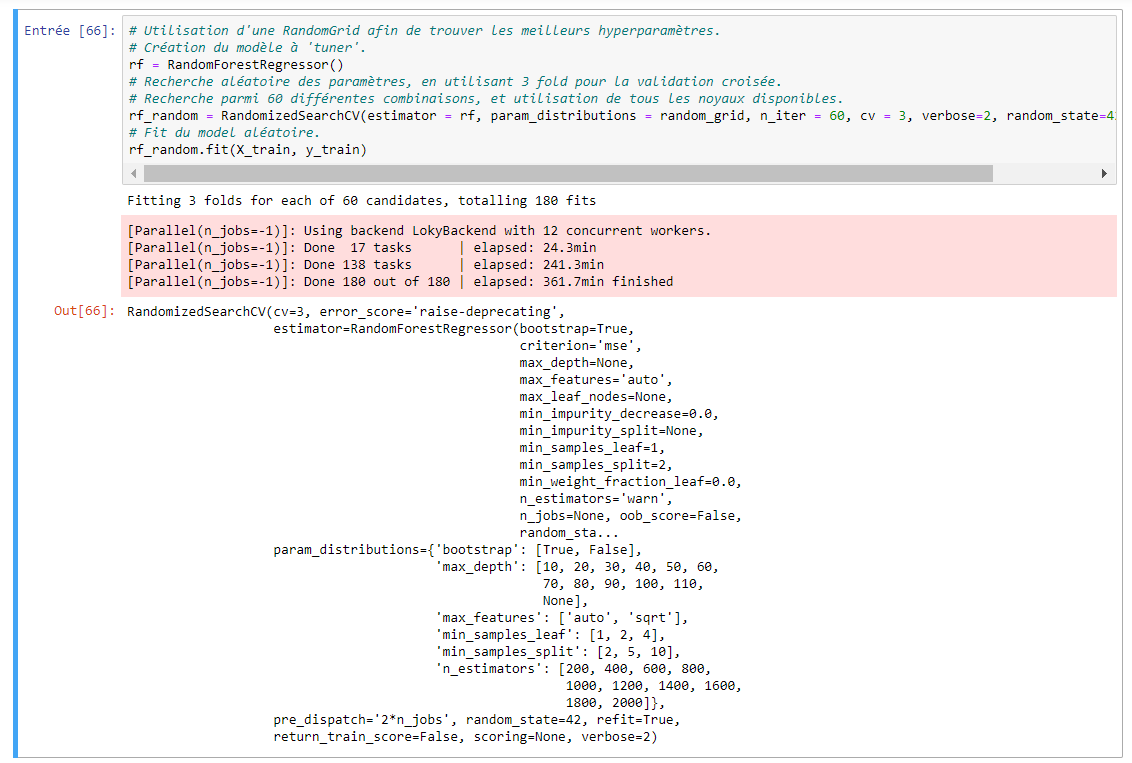

### Meilleurs résultats / paramètres de la RandomizedGridSearch

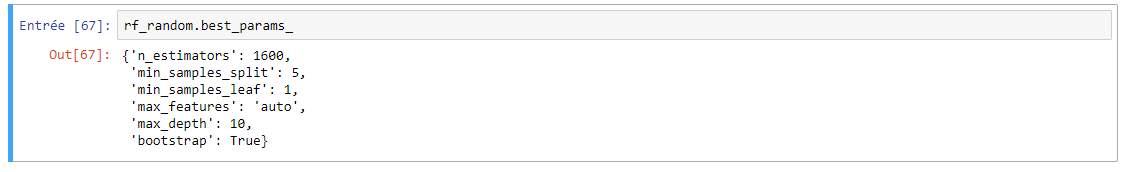

In [78]:
forest = RandomForestRegressor(n_estimators = 1600, min_samples_split = 5, min_samples_leaf = 1, max_features= 'auto',
                               max_depth= 10, bootstrap = True) 

In [79]:
forest.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
Y_pred = forest.predict(test_dummies)
Y_pred

## XGBRegressor :

In [80]:
def printRFScores(r,X,y,msg=None) :
    "Fits a random forest model, and prints training and out-of-bag score."
    r.fit(X,y)
    if msg is not None :
        print(msg,end=' ')
    print('Training score: {:.4f}  OOB score: {:.4f}'.format(r.score(X,y),r.oob_score_))

def printMAE(r,X,y) :
    y_pred = r.predict(X)
    print('{:.3f}'.format(mean_absolute_error(y,y_pred)))

In [81]:
from scipy.stats import uniform, randint
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import xgboost as xgb

In [83]:
# split off a separate validation set:
rs = 32
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.2,random_state=rs)

def tryXGB(learning_rate, n_estimators=1000, early_stopping_rounds=5, verbose=False) :
    r = xgb.XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    r.fit(train_X, train_y, early_stopping_rounds=early_stopping_rounds,
          eval_set=[(val_X, val_y)], verbose=verbose)
    printMAE(r,X,y)

#for i in range(20) :
#    learning_rate = (i+1)*0.01
#    print('{:.2f}'.format(learning_rate),end=' ')
#    tryXGB(learning_rate)

In [84]:
r = xgb.XGBRegressor(n_estimators=23, learning_rate=0.15)
r.fit(X, y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=23, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [ ]:
return90 = r.predict(test_dummies)
return90 = pd.DataFrame(return90)

In [ ]:
indices['return90'] = return90
indices

In [ ]:
indices.to_csv('C:/Users/Davina/Documents/ESIEE/DSIA-4301A-MachineLearning2/Kaggle_Competition/essai_xgboost.csv', index = False)